In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
# Load CSV dataset
# df=pd.read_csv("/content/HousePriceDataset (1).csv")
# Load CSV in YW
df=pd.read_csv("HousePriceDataset (1).csv")
print(f"Number of houses in dataset: {len(df)}")
print(f"Number of variables in dataset: {len(df.columns)}")
df=df.drop(columns=['Unnamed: 0'])
# Display the column names (features) in the dataset
print(f"Features in the dataset: {list(df.columns)}")

# Display basic statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

Number of houses in dataset: 21613
Number of variables in dataset: 21
Features in the dataset: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Summary Statistics:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.90000

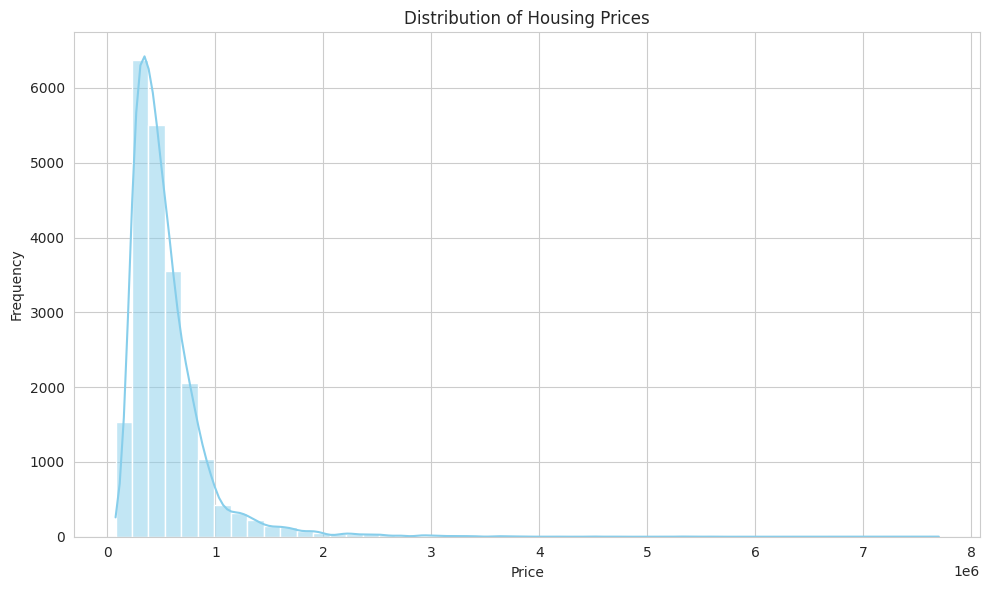

In [3]:
sns.set_style("whitegrid")

# Creating the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')

# Setting the title and labels
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()

# Display the plot
plt.show()

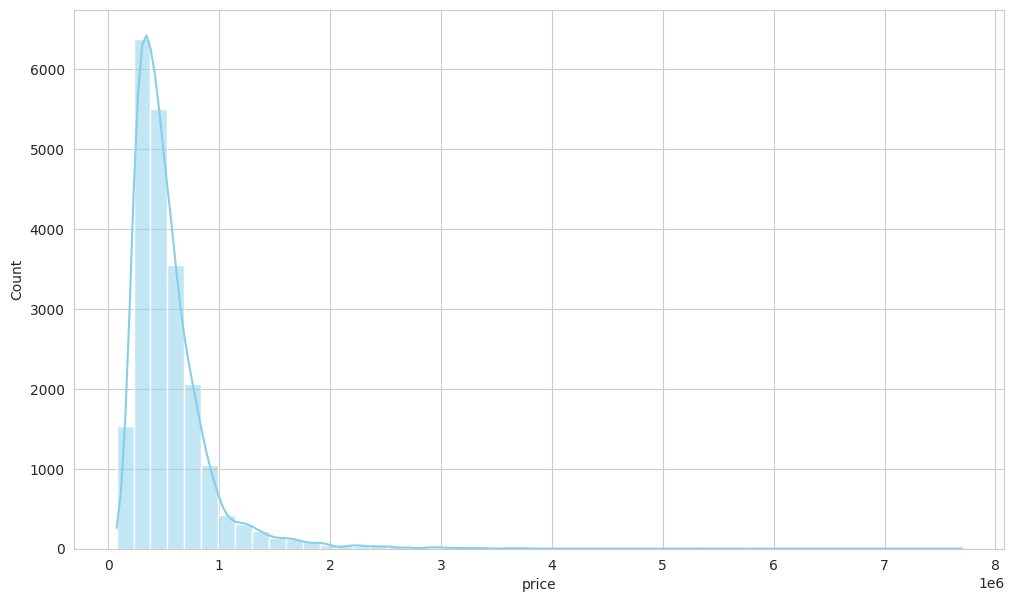

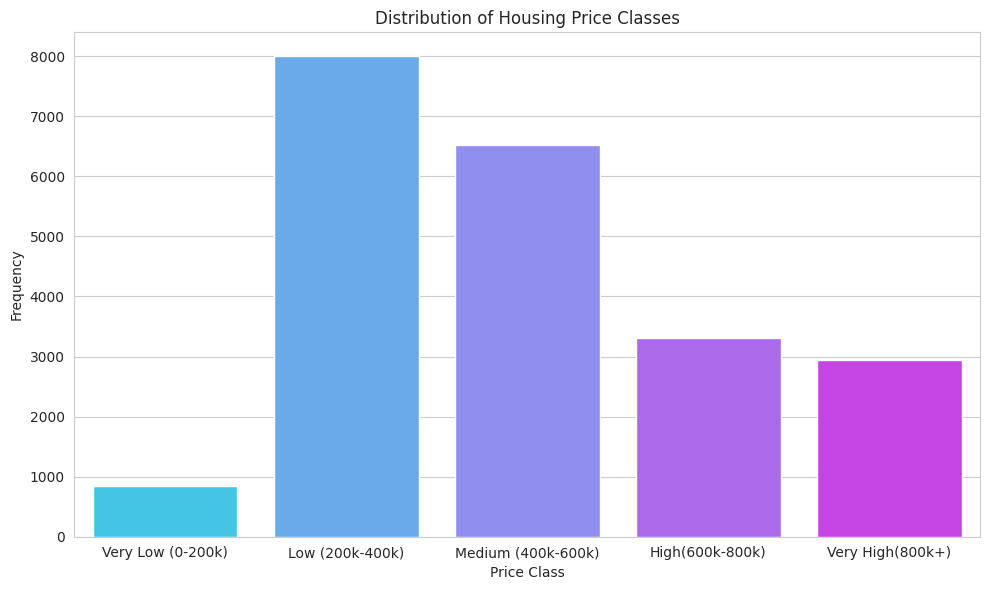

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

price_bins = [0, 200000, 400000, 600000, 800000, np.inf]
price_labels = ['Very Low (0-200k)', 'Low (200k-400k)', 'Medium (400k-600k)', 'High(600k-800k)', 'Very High(800k+)']

# Assign Classes
df['price_class'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)
plt.figure(figsize=(12, 7))
ax = sns.histplot(df['price'], kde=True, bins=50, color='skyblue')


plt.figure(figsize=(10, 6))
sns.countplot(x='price_class', data=df, palette='cool')
plt.title('Distribution of Housing Price Classes')
plt.xlabel('Price Class')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
### Clean the data  'sqft_lot15'
def clean_data(value):
    if isinstance(value, str) and value.startswith("b'"):
        return float(value[2:-1])
    return float(value)

df['sqft_lot15'] = df['sqft_lot15'].apply(clean_data)

df_x = df.drop(['price_class'],axis=1)
min_max_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df_x), columns=df_x.columns)
#X = df_normalized.drop(['price','id','zipcode'], axis=1)
#X = df_normalized.drop(['price','id','zipcode','grade','sqft_living','bedrooms','sqft_above','waterfront'], axis=1)
X = df_normalized.drop(['price','id','zipcode','long','floors','yr_renovated','condition','sqft_lot'], axis=1)
#X=df
y = df['price']
# For One-vs-All
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=100),n_jobs=10)  # Increased max_iter for convergence
ovo_model.fit(X_train, y_train)

# One-vs-All Logistic Regression
ova_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))  # Increased max_iter for convergence
ova_model.fit(X_train, y_train)
# One-vs-One Logistic Regression


KeyboardInterrupt: ignored

In [ ]:
y_pred_ova = ova_model.predict(X_test)
y_pred_ov0 = ovo_model.predict(X_test)

print("One-vs-All Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ova))
print(classification_report(y_test, y_pred_ova))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ova))

# Predictions and Performance Evaluation for One-vs-One
y_pred_ovo = ovo_model.predict(X_test)
print("\nOne-vs-One Performance:")

|print("Accuracy:", accuracy_score(y_test, y_pred_ovo))
print(classification_report(y_test, y_pred_ovo))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ovo))